### Tugas 1

Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier # import RandomForest

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('assets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Feature Selection

In [5]:
X = df.drop(['class'], axis=1)
y = df['class']

X = pd.get_dummies(X, dtype=int)
y = pd.get_dummies(y, dtype=int)

In [6]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [8]:
y

,e,p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
8119,1,0
8120,1,0
8121,1,0
8122,0,1


Split Data & Feature Extraction

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Train Decision Tree

In [12]:
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3, min_samples_leaf=5)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=1)

[Text(334.80000000000007, 380.52, 'X[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [[3111, 3388]\n[3388, 3111]]'),
 Text(133.92000000000002, 271.8, 'X[21] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [[3023, 637]\n[637, 3023]]'),
 Text(66.96000000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 2583\nvalue = [[2583, 0]\n[0, 2583]]'),
 Text(200.88000000000002, 163.07999999999998, 'X[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [[440, 637]\n[637, 440]]'),
 Text(133.92000000000002, 54.360000000000014, 'entropy = 0.933\nsamples = 676\nvalue = [[440, 236]\n[236, 440]]'),
 Text(267.84000000000003, 54.360000000000014, 'entropy = 0.0\nsamples = 401\nvalue = [[0, 401]\n[401, 0]]'),
 Text(535.6800000000001, 271.8, 'X[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [[88, 2751]\n[2751, 88]]'),
 Text(468.72, 163.07999999999998, 'X[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [[33, 2751]\n[2751, 33]]'),
 Text(401.76000000000005, 54.360000000000014, 'entropy = 0.

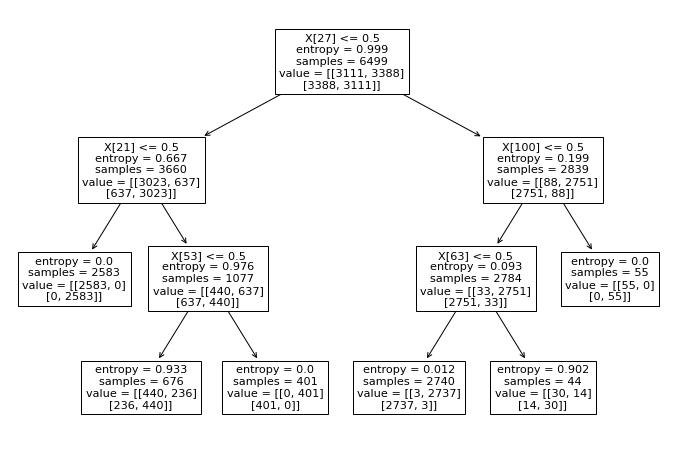

In [13]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [14]:
y_pred_en = clf_en.predict(X_test)

In [15]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [16]:
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy index: 0.9637
Training-set accuracy score: 0.9611
